In [3]:
import networkx as nx
import numpy as np

In [4]:
dic={'Pizza':0,'Burger':1,'HotDog':2}
vertex=['Pizza','Burger','HotDog']
edges=[('Pizza','Burger',0.25),('Pizza','Pizza',0.5),('Pizza','HotDog',0.25),('Burger','Burger',0.5),('Burger','Pizza',0.5),('HotDog','Pizza',0.5),('HotDog','HotDog',0.5)]

In [5]:
G=nx.Graph()

In [6]:
G.add_nodes_from(vertex)
G.add_weighted_edges_from(edges)

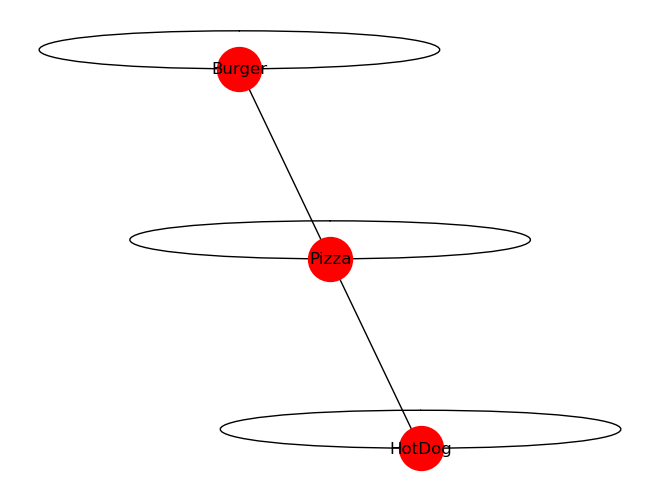

In [7]:
nx.draw(G,with_labels=True,node_color='red',node_size=1000)

In [8]:
#Transistion Matrix

A=np.array([[0.5,0.25,0.25],[0.5,0.5,0],[0.5,0,0.5]])

In [9]:
#Random Walk

def random_walk(G,node,len):
    rand_walk=[node]
    while(len-1):
        neigh=np.random.choice(vertex,p=A[dic[node]])
        rand_walk.append(neigh)
        node=neigh
        len-=1
    return rand_walk

In [13]:
print(random_walk(G,'Burger',10))

['Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Pizza', 'HotDog', 'HotDog']


In [25]:
#Stationary
def randSta(G,node):
    steps=10**6
    start_node=node
    val=np.array([0,0,0])
    val[dic[node]]=1
    for i in range(steps):
        neigh=np.random.choice(vertex,p=A[dic[node]])
        val[dic[neigh]]+=1
        node=neigh
    return val/steps

In [26]:
randSta(G,'Pizza')

array([0.500332, 0.249641, 0.250028])

In [27]:
#matrix one

def markov_matrix(A):
    A_n=A
    steps=10**6
    for i in range(steps):
        A_n=np.matmul(A_n,A)
    return A_n

In [28]:
markov_matrix(A)

array([[0.5 , 0.25, 0.25],
       [0.5 , 0.25, 0.25],
       [0.5 , 0.25, 0.25]])